In [1]:
import os
import numpy as np
import cv2
import ast

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
LETTERS = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
SMALL_LETTERS = [x.lower() for x in LETTERS]
NUMBERS = ['0','1','2','3','4','5','6','7','8','9']
SYMBOLS = ['@','$','&',',','period','-']

In [5]:
# Import the data
#### This cell takes ~90s to execute (for color data)
#### This cell takes ~20s to execute (for gray data)

X = []
y = []

for letter in LETTERS:

    with open(fr".\Uppercase\{letter}\{letter}.txt", "r") as newfile:
        
        for i in range(35):
            target, data = newfile.readline().split("::")
            data = ast.literal_eval(data)
            y.append(target)
            X.append(data)

In [6]:
# print(y[0]) # A
# print(np.array(y).shape) # (910,)
# print(np.array(y).ndim) # 1
# print(np.array(X).shape) # (910, 73, 73, 3)
# print(np.array(X).ndim) # 4
# print(type(X[0])) $ <class 'list'>
# # print(X[0])

A
(910,)
1
(910, 73, 73, 3)
4
<class 'list'>


In [7]:
# Trying to reshape the X-input data
X = np.array(X)
y = np.array(y)

X = X.reshape((910,-1))

In [8]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# print(y_test)
print(X_train.shape)
print(X_test[0])

(609, 15987)
[247 247 247 ... 254 254 254]


We will use the 'elbow method' to determine the best value of k to use.

In [21]:
error_rates = []

for i in range(1,30): # Took ~6min to execute
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    error_rates.append(np.mean(predictions != y_test))

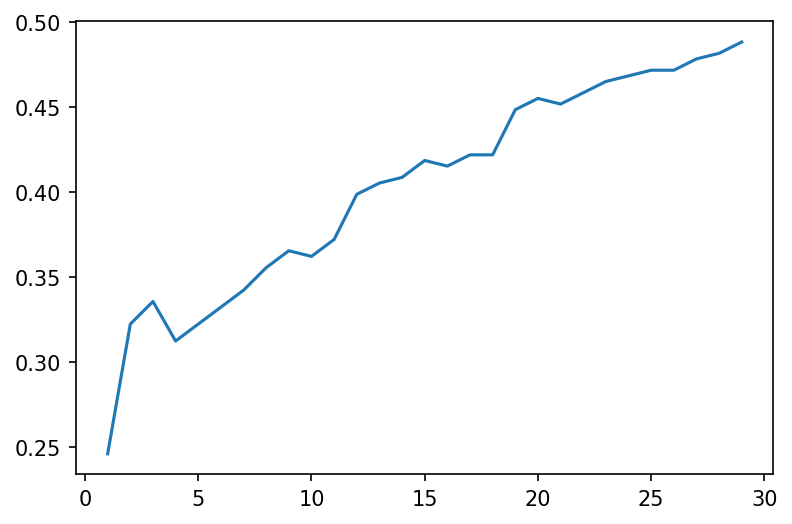

In [23]:
# Visualize the error rates

plt.plot(range(1,30), error_rates)

In [10]:
# Instantiate model object
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

In [11]:
# Fit the model with training data

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Evaluate the model (with testing data)

predictions = knn_model.predict(X_test)

In [13]:
# Evaluate the model
#### Need to assess predictions vs. y_test

classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           A       0.82      0.82      0.82        11\n           B       0.80      0.73      0.76        11\n           C       0.43      0.64      0.51        14\n           D       0.67      0.60      0.63        10\n           E       0.88      0.70      0.78        10\n           F       0.33      0.89      0.48         9\n           G       0.50      0.82      0.62        11\n           H       0.86      0.75      0.80         8\n           I       0.73      0.61      0.67        18\n           J       0.73      0.57      0.64        14\n           K       0.82      0.60      0.69        15\n           L       0.62      0.80      0.70        10\n           M       0.92      0.86      0.89        14\n           N       0.64      0.82      0.72        11\n           O       0.75      0.55      0.63        11\n           P       0.60      0.21      0.32        14\n           Q       1.00      0.08      0.15        12\n       

In [14]:
confusion_matrix(y_test, predictions)

array([[ 9,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  9,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  6,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 

In [15]:
# Not sure how to interpret the above two reports...so we will instead use plots!

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.dpi"] = 150

<AxesSubplot:>

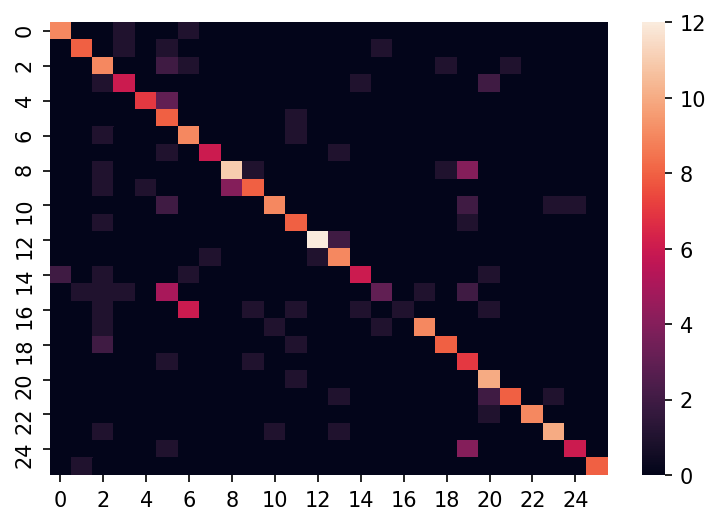

In [16]:
sns.heatmap(confusion_matrix(y_test,predictions))

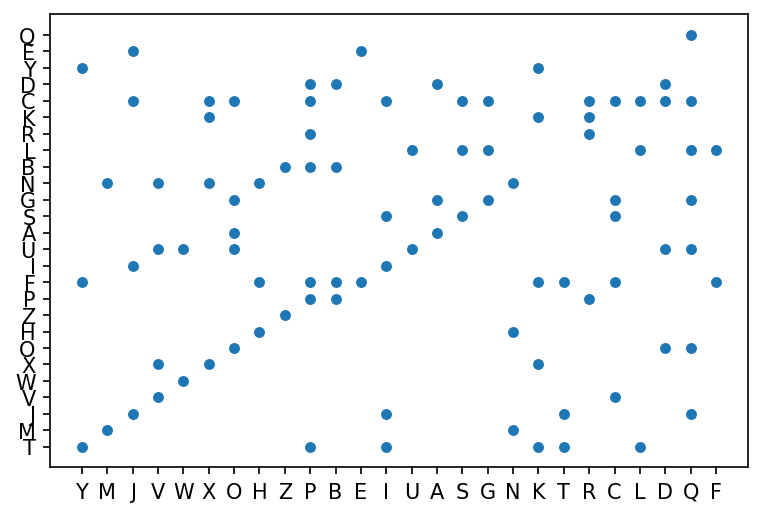

In [17]:
fig, axes = plt.subplots(1,1)

# axes.plot(y_test, predictions)

#### NOTE: The lines below only change the tick LABELS!!! They don't affect the data points!
# axes.set_xticklabels(LETTERS)
# axes.set_yticklabels(LETTERS)

ax = sns.scatterplot(x = y_test,
                y = predictions)
# ax.set_xlim(LETTERS)

In [18]:
y_test

array(['Y', 'M', 'J', 'V', 'W', 'X', 'O', 'H', 'Z', 'V', 'P', 'Z', 'B',
       'E', 'I', 'U', 'A', 'M', 'S', 'O', 'I', 'G', 'G', 'N', 'N', 'X',
       'K', 'T', 'T', 'I', 'B', 'N', 'G', 'U', 'J', 'S', 'R', 'A', 'J',
       'O', 'G', 'K', 'B', 'C', 'V', 'G', 'I', 'C', 'K', 'L', 'V', 'S',
       'N', 'R', 'H', 'C', 'D', 'D', 'W', 'P', 'Y', 'B', 'U', 'P', 'H',
       'E', 'Z', 'O', 'Z', 'J', 'M', 'W', 'Q', 'U', 'J', 'M', 'Y', 'I',
       'U', 'B', 'M', 'F', 'I', 'D', 'B', 'J', 'H', 'N', 'D', 'T', 'G',
       'U', 'H', 'I', 'M', 'Q', 'X', 'C', 'H', 'I', 'E', 'G', 'L', 'X',
       'J', 'R', 'Y', 'Q', 'V', 'Q', 'G', 'I', 'G', 'T', 'I', 'W', 'Q',
       'P', 'Z', 'C', 'V', 'D', 'J', 'R', 'P', 'H', 'J', 'C', 'F', 'F',
       'E', 'I', 'R', 'O', 'O', 'B', 'K', 'S', 'T', 'J', 'X', 'K', 'I',
       'B', 'S', 'S', 'W', 'I', 'Z', 'I', 'N', 'A', 'A', 'T', 'L', 'O',
       'Z', 'D', 'C', 'K', 'F', 'C', 'J', 'M', 'G', 'O', 'Y', 'P', 'A',
       'B', 'P', 'R', 'J', 'T', 'C', 'U', 'V', 'Q', 'Y', 'M', 'W

In [19]:
predictions

array(['T', 'M', 'J', 'V', 'W', 'X', 'O', 'H', 'Z', 'X', 'P', 'Z', 'F',
       'F', 'I', 'U', 'A', 'M', 'S', 'U', 'I', 'G', 'G', 'H', 'N', 'X',
       'F', 'T', 'T', 'I', 'B', 'N', 'G', 'U', 'I', 'L', 'R', 'G', 'J',
       'G', 'G', 'K', 'B', 'C', 'V', 'G', 'I', 'C', 'T', 'L', 'V', 'S',
       'N', 'R', 'F', 'C', 'D', 'U', 'W', 'F', 'Y', 'B', 'U', 'B', 'N',
       'E', 'Z', 'O', 'B', 'J', 'M', 'W', 'L', 'U', 'J', 'M', 'T', 'S',
       'U', 'B', 'M', 'F', 'T', 'C', 'P', 'I', 'H', 'N', 'D', 'T', 'G',
       'U', 'H', 'J', 'M', 'J', 'X', 'C', 'H', 'I', 'E', 'G', 'T', 'C',
       'I', 'R', 'T', 'G', 'V', 'Q', 'C', 'I', 'G', 'F', 'I', 'W', 'G',
       'F', 'Z', 'F', 'V', 'D', 'E', 'C', 'R', 'H', 'J', 'C', 'F', 'L',
       'E', 'T', 'R', 'O', 'C', 'B', 'X', 'S', 'T', 'I', 'X', 'K', 'I',
       'D', 'C', 'C', 'W', 'I', 'Z', 'C', 'N', 'A', 'A', 'J', 'L', 'O',
       'Z', 'D', 'C', 'F', 'F', 'C', 'C', 'M', 'L', 'O', 'Y', 'D', 'A',
       'B', 'P', 'R', 'J', 'T', 'C', 'L', 'U', 'C', 'Y', 'M', 'W

In [20]:
# Manually determine percent accuracy
count=0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]:
        count+=1

percent = count/len(y_test) * 100
print("Number of predictions made: ", len(y_test))
print("Number correct: ", count)
print("Percentage correct: ", round(percent, 2), "%")

Number of predictions made:  301
Number correct:  204
Percentage correct:  67.77 %
